## Capstone #3: Daegu Apartment Dataset: Price Prediction ##

Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors. 

Individuals or companies usually make apartment (unit) offers. Bidders can sell units on a platform by determining their apartments’ prices. That way is quite difficult for apartment owners to adjust to market prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.

**Features:**<br>
1. Hallway Type: Apartment type
2. TimeToSubway: Time needed to the nearest subway station
3. SubwayStation: The name of the nearest subway station
4. N_FacilitiesNearBy(ETC): The number of facilities nearby
5. N_FacilitiesNearBy(PublicOffice): The number of public office facilities nearby
6. N_SchoolNearBy(University): The number of universities nearby
7. N_Parkinglot(Basement): The number of the parking lot
8. YearBuilt: The year the apartment was built
9. N_FacilitiesInApt: Number of facilities in the apartment
10. Size(sqft): The apartment size (in square feet)
11. SalePrice: The apartment price (Won)


<br><br>**Project Goals**<BR>
The primary objective of this project is to develop a predictive model that accurately estimates the price of apartments (SalePrice) based on various internal and external factors. By analyzing and modeling the dataset, the following goals will be achieved:

1. Understand Key Factors Influencing Apartment Prices

    > Identify which features (e.g., apartment size, year built, proximity to ? subway stations, etc.) most strongly impact apartment prices.<br>
    > Provide insights into how these factors correlate with market pricing.
    
2. Develop a Pricing Model

    > Build a robust regression model that can predict apartment prices accurately.<br>
    > Assist owners or bidders in setting realistic apartment prices to maximize  profits and ensure competitiveness.

3. Evaluate Model Performance

    > Use appropriate evaluation metrics to measure the accuracy and reliability of the predictions.

4. Generate Business Insights

    > Provide actionable recommendations to apartment owners and prospective buyers based on model outcomes.

<br><br>
**Evaluation Metrics**<BR>
Since the project goal is to predict apartment price, this is a regression problem. The following metrics can be used to evaluate the model performance:

1. Root Mean Squared Error (RMSE): The reason is it penalizes larger errors more significantly, ensuring the model prioritizes reducing substantial deviations.

2. Mean Absolute Error (MAE): The reason is it is less sensitive to large errors, ensuring the model prioritizes reducing small deviations.

3. R-squared: The reason is it gives a high-level overview of model performance and explains variance in 'SalePrice'.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filepath = r'C:\Users\Asus\Desktop\DS Purwa\Module_3\Capstone Module 3\CSV File\data_daegu_apartment.csv'
df_raw = pd.read_csv(filepath)
df = df_raw.copy()
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


Perform summary inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [5]:
df.describe(include='all')

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123,4123,4123,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
unique,3,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,terraced,0-5min,Kyungbuk_uni_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2528,1953,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,NaN,NaN,NaN,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,NaN,NaN,NaN,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,NaN,NaN,NaN,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,NaN,NaN,NaN,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000


## Data Cleaning

In [ ]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  


list_item = []

for col in df.columns:
    list_item.append([col, df[col].nunique(), list(df[col].drop_duplicates())])
    
desc = pd.DataFrame(columns=['Columns', 'Unique Values', 'All Unique Values'], data=list_item)
desc

,Columns,Unique Values,All Unique Values
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),18,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,8,"[10, 4, 5, 7, 2, 9, 8, 3]"
9,Size(sqf),82,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 846, 273, 277, 779, 498, 736, 430, 213, 1369, 547, 839, 793, 1085, 1060, 832]"


Based on the description of the data, we can conclude that no column should be drop because every column has impact on the target feature that is 'SalePrice'.

Before going any further, I notice something in the unique value of SubwayStation that is no_subway_nearby. If there exist within the dataset that there is no_subway_nearby, surely it means the neighboring column, TimeToSubway, has the same value as well. Therefore, I conduct a check if it is the case.

In [7]:
problematic_data = df.loc[(df['SubwayStation'] == 'no_subway_nearby') & (df['TimeToSubway'] != 'no_bus_stop_nearby')]
problematic_data

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
37,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,156,57522
39,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,391150
44,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,914,411504
83,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,56637
165,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,256637
...,...,...,...,...,...,...,...,...,...,...,...
3818,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,256637
3836,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,252212
3841,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,394690
3886,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,269911


Turns out there is an anomaly inside the dataset. Therefore it needs to be drop

In [8]:
df = df.drop(problematic_data.index)
df.shape

(4004, 11)

In [9]:
# Check duplicate values in the dataset

duplicate = df.duplicated().sum()

print(f'There are {duplicate} duplicate values in the dataset.')

There are 1391 duplicate values in the dataset.


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

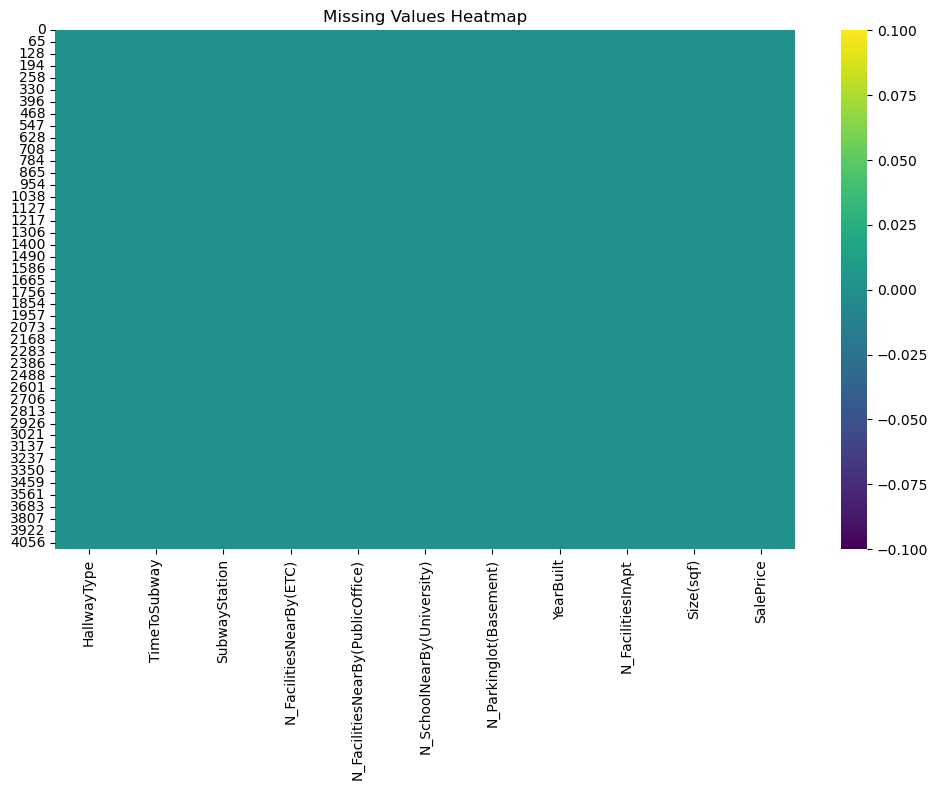

In [12]:
# Visual representation of missing values in the dataset

plt.figure(figsize=(10,8))
sns.heatmap(data=df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()


## EDA

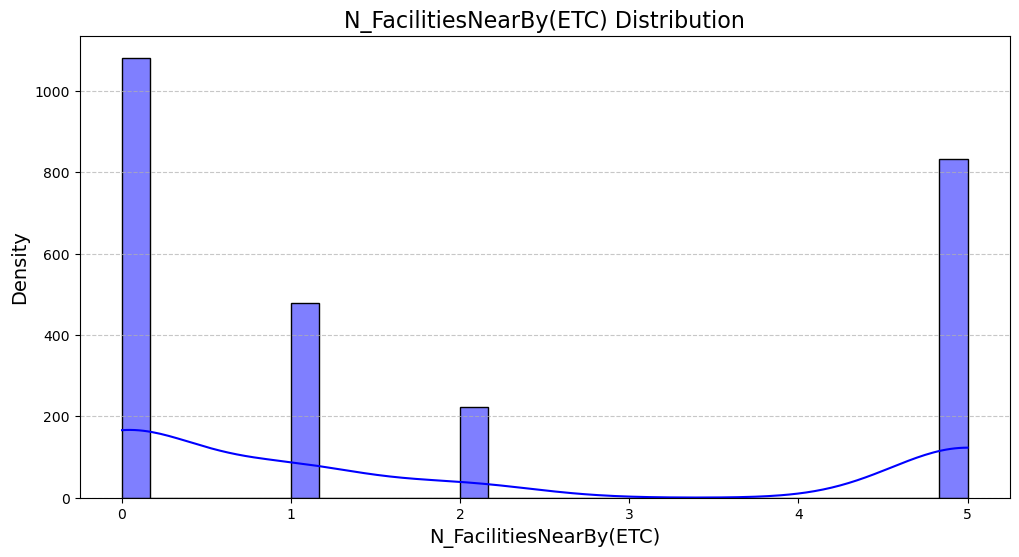

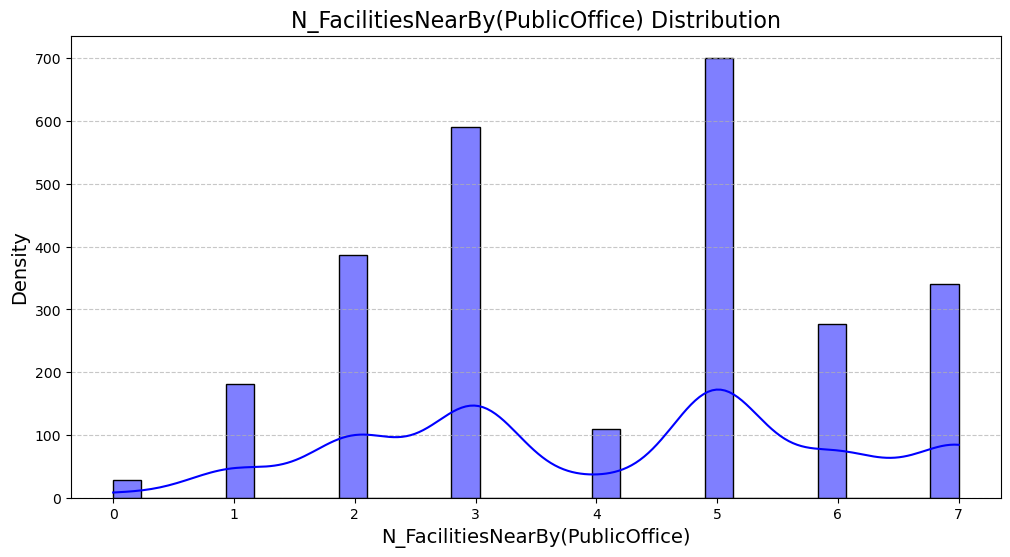

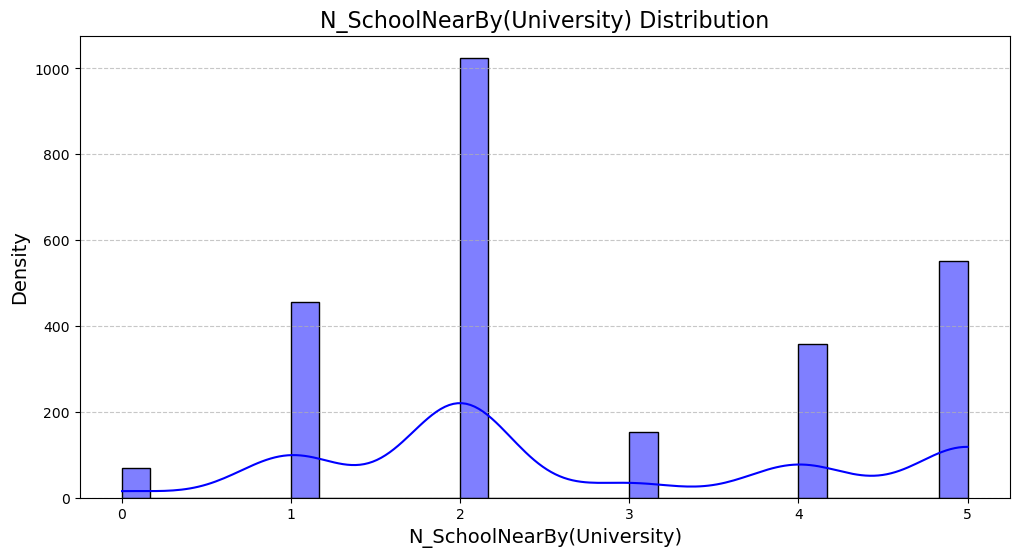

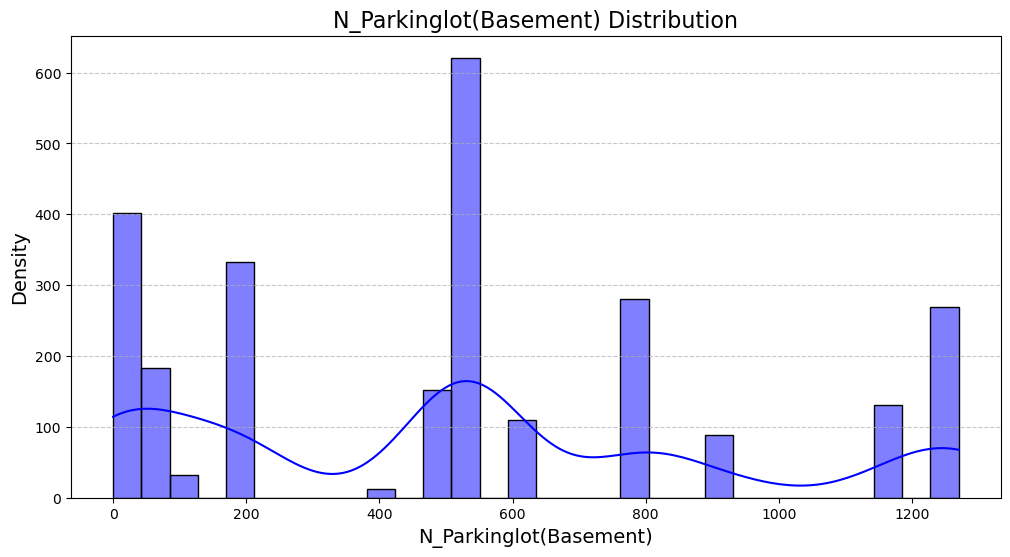

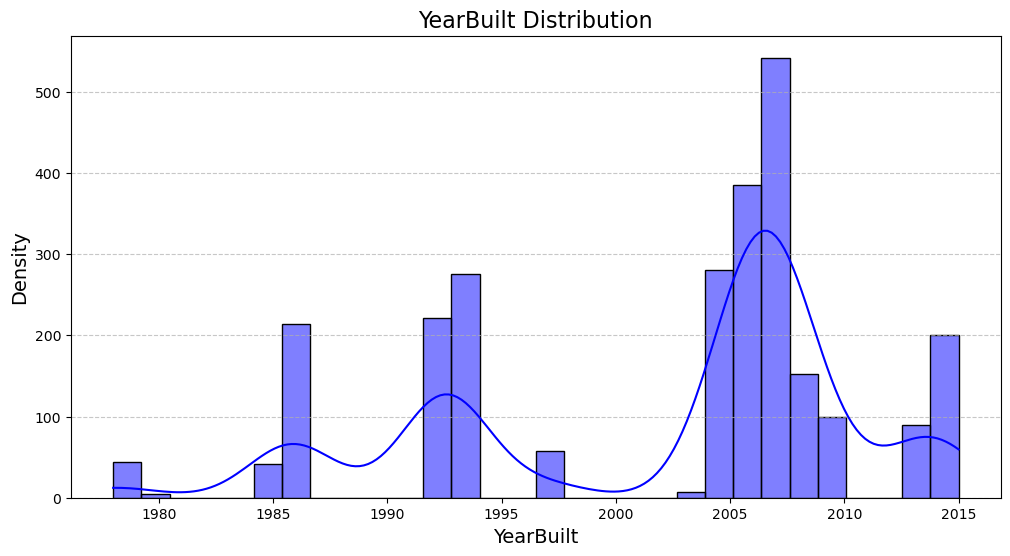

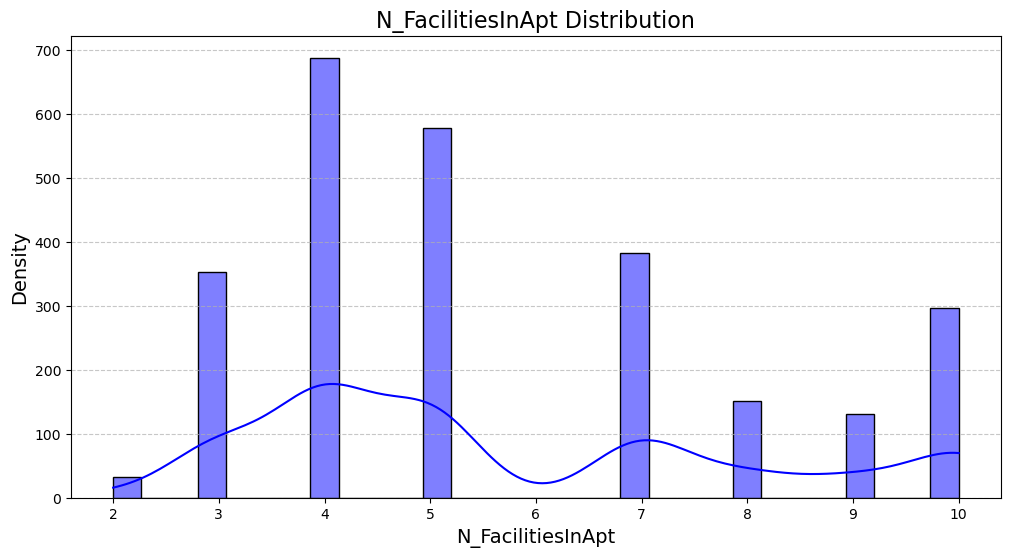

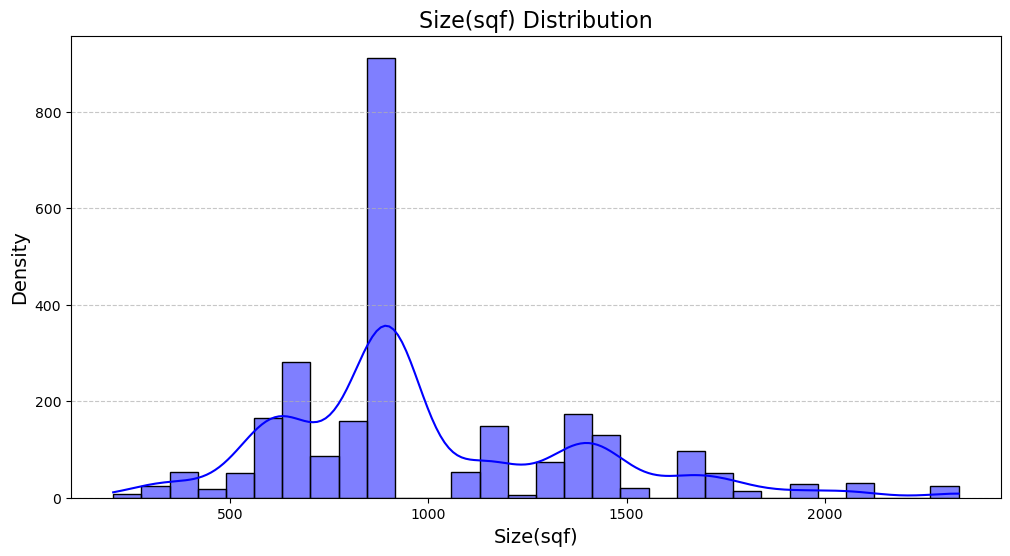

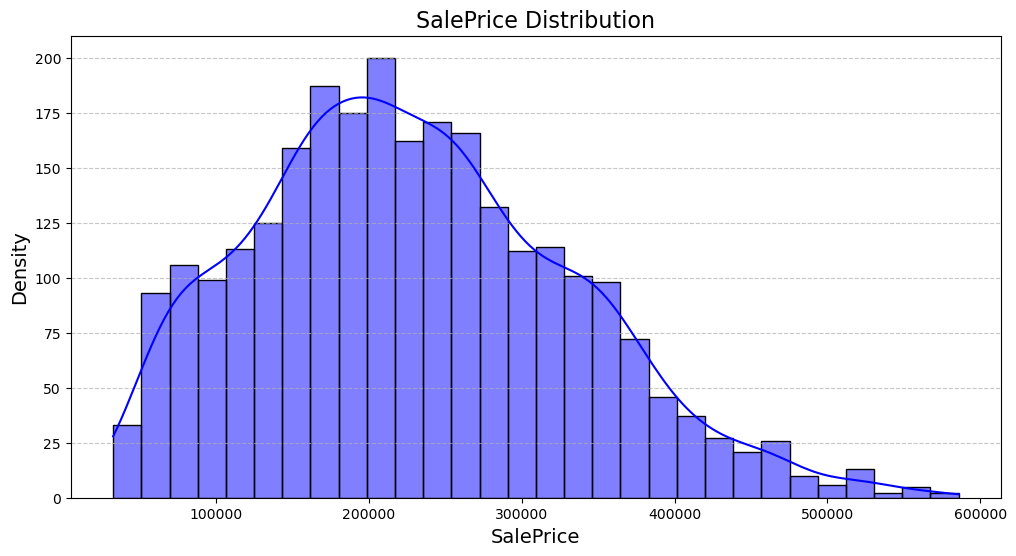

In [13]:
# Checking data distribution of numerical columns

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(12, 6))  
    sns.histplot(df[col], kde=True, bins=30, color='blue') 
    plt.title(f'{col} Distribution', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  
    plt.show()

From the distribution graph above, we can conclude that the data is not normally distributed.

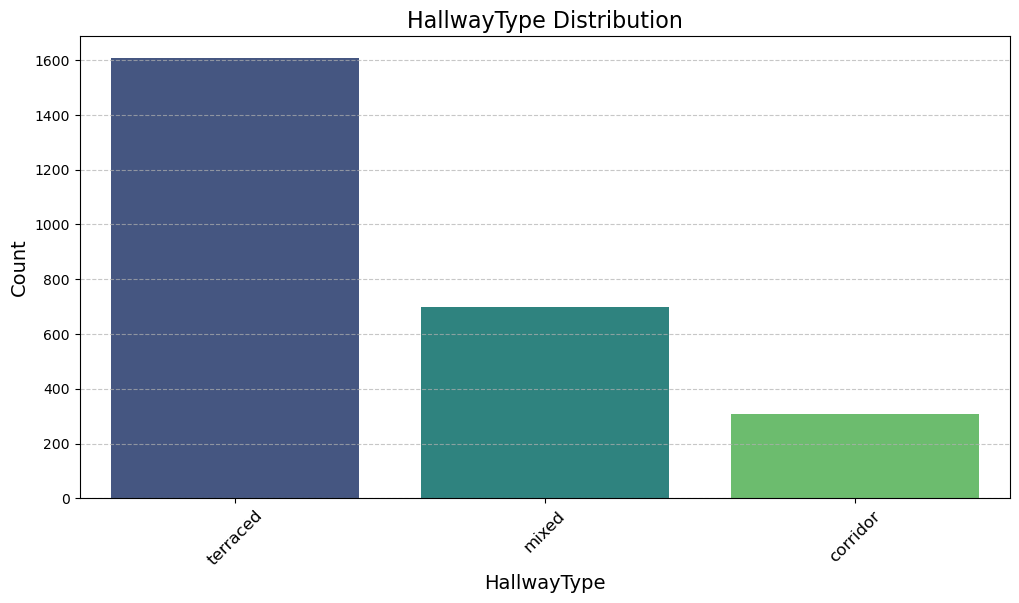

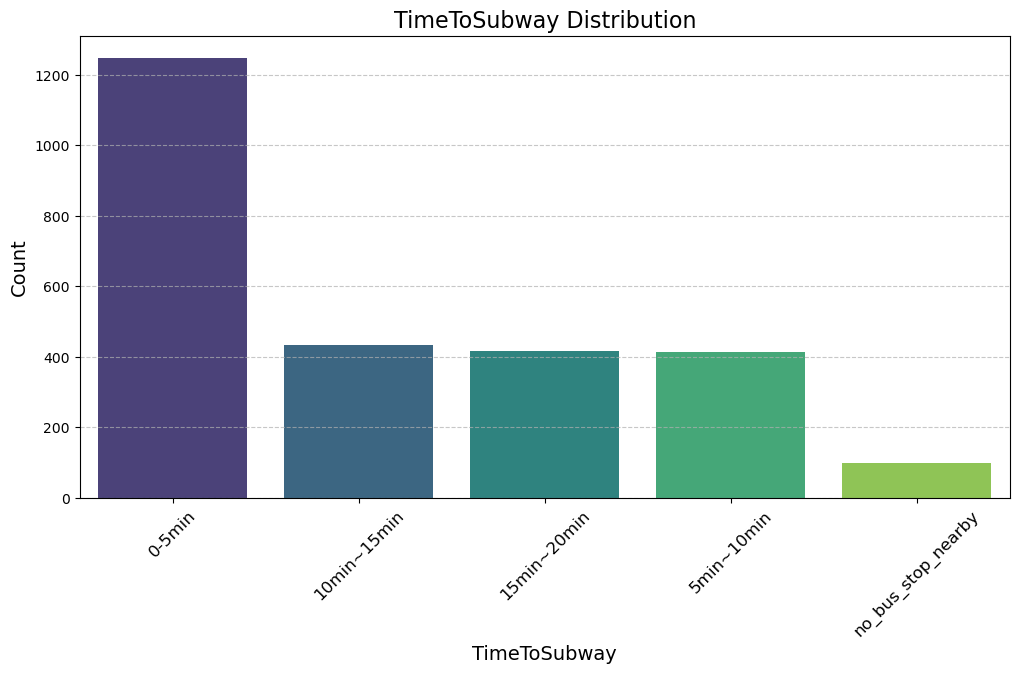

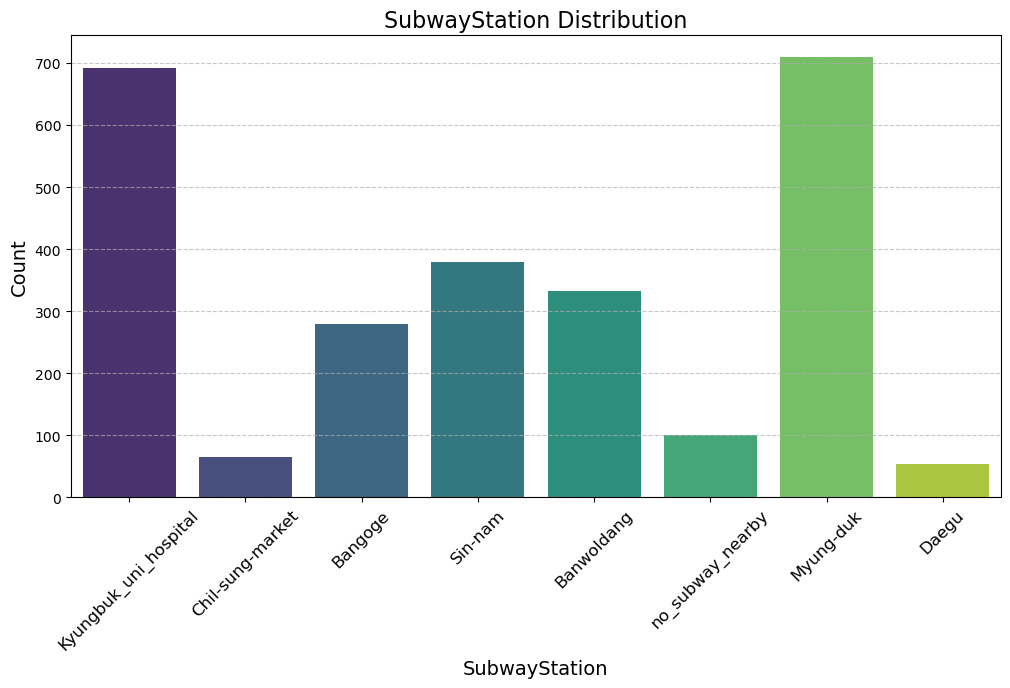

In [14]:
# Checking categorical variables distribution

categorical_col = df.select_dtypes(include=['object']).columns

for col in categorical_col:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f'{col} Distribution', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7) 
    plt.xticks(rotation=45, fontsize=12)  
    plt.show()

Next part, we will see the correlation of the features with the target variable.

C:\Users\Asus\AppData\Local\Temp\ipykernel_20932\940360162.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = df.corr()


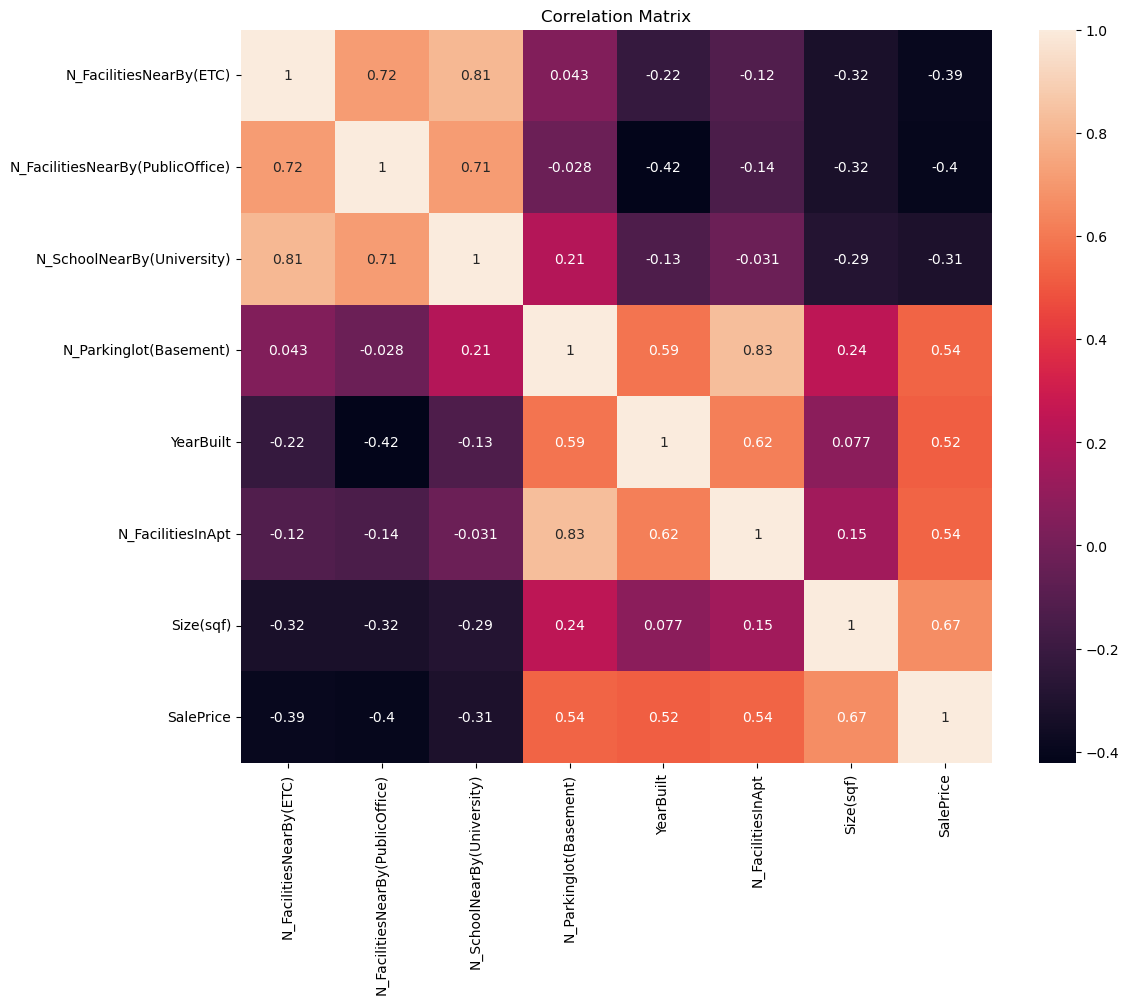

In [15]:
matrix_corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(matrix_corr, annot=True)
plt.tight_layout()
plt.title('Correlation Matrix')
plt.show()

Focus on the SalePrice correlation to other features. Several insight we can gain from this:<br>
1. The positive correlation: There are 4 features that have positive relationship with SalePrice. The Size is the largest positive correlation with the SalePrice meaning the larger the apartment size, the higher the price in which make a lot of sense. The next is N_FacilitiesinApt which is the number of facilities in the apartment meaning that apartments with more amenities are likely to be more expensive. The next feature is N_Parkinglot meaning that parking availability adds value to the apartment. The last feature is YearBuilt indicating that the newer apartment has a higher price than the older ones creating a positive relationship with the SalePrice.<br><br>
2. The negative correlation: There are 3 features that have negative relationship with SalePrice. The largest negative value is N_FacilitiesNearby(PublicOffice) indicating that being closer to public offices may not necessarily increase an apartment’s value. The second one is N_FacilitiesNearby(ETC). From the description of the dataset, there is no specifics about what facilities are considered in here. We will assume facilities such as shops or entertainment venues are what the dataset is talking about. From the value, it suggest proximity to certain types of facilities does not always increase apartment value. The last feature is N_Schoolnearby which suggesting that being close to schools or universities does not significantly affect the price in this case.

Now we check collinearity of the dataset.

In [16]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define Features
X = df[['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)']]

# Define target
y = df['SalePrice']

# Fit the OLS regression model
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

# Calculate VIF for each predictor variable
vif = pd.DataFrame(index=X.columns)
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
vif.sort_values(by="VIF", ascending=False)

,VIF
YearBuilt,37.104189
N_FacilitiesInApt,28.607699
N_SchoolNearBy(University),17.793242
N_FacilitiesNearBy(PublicOffice),14.107873
N_Parkinglot(Basement),12.244461
Size(sqf),9.944374
N_FacilitiesNearBy(ETC),6.022058


From the VIF value, all of the variable has the value more than 5. In general cases, we need to remove the column with high VIF value. However, in this case, we won't be removing any column because every column has an impact on the target variable.

And we are done with the preparations for the data! We will save the cleaned data in a new CSV file.

In [18]:
df.to_csv('Daegu_Cleaned.csv')